# Importing pandas library

In [1]:
import pandas as pd

# Importing the dataset 

In [2]:
phis = pd.read_csv('./Phishing_Legitimate_full.csv')

# Viewing the contents of the dataset

In [3]:
phis.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# Checking for presence of null values

In [4]:
phis.isna().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


# Extracting the names of the columns for easier coding 

In [5]:
phis.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

# Importing libraries for visualisations and carrying out mathematical operations

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams


# Importing warnings library to ignore all warning messages and beautify the program

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Creating output for "CLASS_LABEL" column

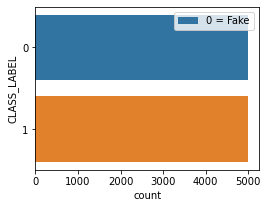

In [9]:
rcParams['figure.figsize'] = 4,3
sns.countplot(y ='CLASS_LABEL', data = phis)
plt.legend(['0 = Fake'], loc='upper right')
 
plt.show()

# Creating boxplot for "CLASS_LABEL" column based on "UrlLength" column

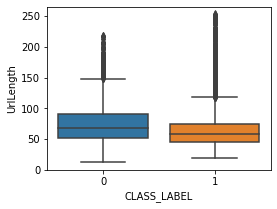

In [10]:
rcParams['figure.figsize'] = 4,3
#sns.set_style("whitegrid")
  
sns.boxplot(x = 'CLASS_LABEL', y = 'UrlLength', data = phis);

# Creating Scatterplot for "CLASS_LABEL" column based on "HostnameLength" column

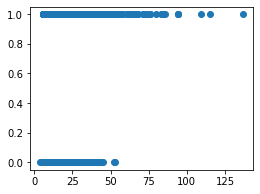

In [11]:
x=phis['HostnameLength']
y=phis['CLASS_LABEL']
plt.scatter(x,y);

# Creating correlation matrix for finding relation between the overall dataset

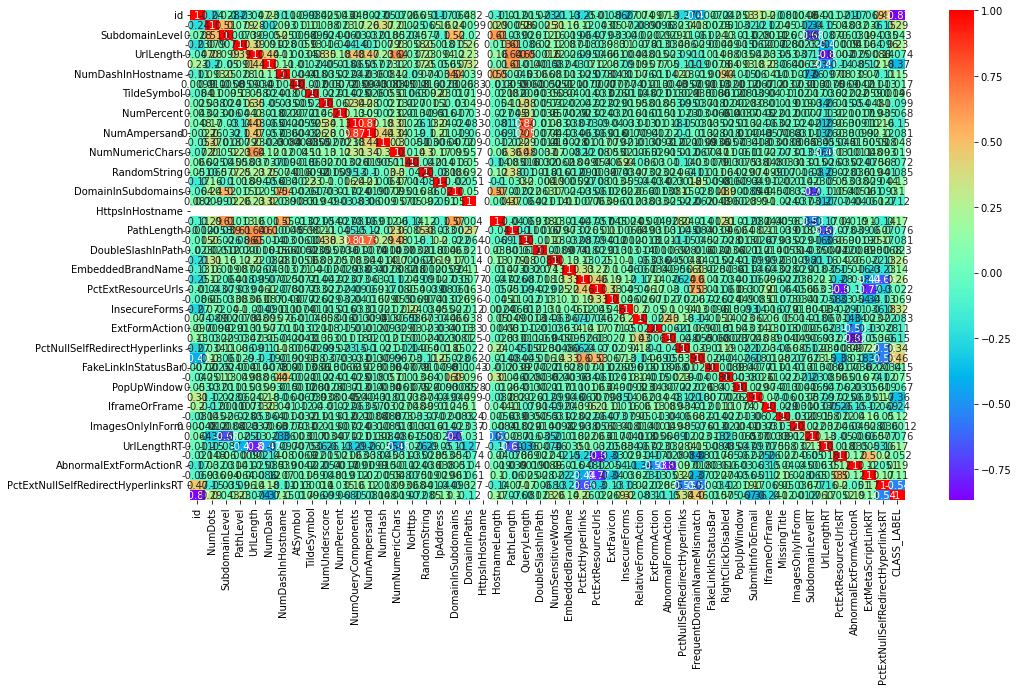

In [12]:
corr_phis = phis.corr()
features = corr_phis.index
plt.figure(figsize=(16,9))
corrplot=sns.heatmap(phis[features].corr(),annot=True,cmap="rainbow")

# Importing library for splitting the dataset into test and train sections

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
X=phis.drop(['CLASS_LABEL'], axis=1)
y=phis[['CLASS_LABEL']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

# Importing library for logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lrc_phis = LogisticRegression(random_state = 0)

In [29]:
lrc_phis.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred = lrc_phis.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[1586,   36],
       [  53, 1625]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

0.973030303030303

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1622
           1       0.98      0.97      0.97      1678

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



# Importing library for Support Vector Machine

In [34]:
from sklearn.svm import SVC

In [35]:
svc_phis = SVC(C= .15, kernel='linear', gamma= 2)

In [36]:
svc_phis.fit(X_train, y_train)

SVC(C=0.15, gamma=2, kernel='linear')

In [37]:
y_pred = svc_phis.predict(X_test)

In [38]:
confusion_matrix(y_pred,y_test)

array([[1622,    0],
       [   0, 1678]], dtype=int64)

In [39]:
accuracy_score(y_test, y_pred)

1.0

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1622
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



# Importing library for KMeans

In [41]:
from sklearn.cluster import KMeans

In [42]:
clust = phis[['NumDots','NumDash','CLASS_LABEL']]
clust

,NumDots,NumDash,CLASS_LABEL
0,3,0,1
1,3,0,1
2,3,0,1
3,3,1,1
4,3,0,1
...,...,...,...
9995,3,0,0
9996,2,1,0
9997,2,0,0
9998,3,0,0


In [43]:
kmc_phis = KMeans(4)
kmc_phis.fit(clust)

KMeans(n_clusters=4)

In [44]:
cluster = kmc_phis.fit_predict(clust)
cluster

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_phis = KNeighborsClassifier(n_neighbors=4)

In [47]:
knn_phis.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
y_pred=knn_phis.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
knn_phis.score(X_test, y_test)

1.0

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1622
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



# Importing library for Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc_phis = RandomForestClassifier(n_estimators = 50) 

In [53]:
rfc_phis.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [54]:
y_pred = rfc_phis.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

1.0

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1622
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



# Importing library for Decision Tree Classifer

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [58]:
dtc_phis = DecisionTreeClassifier() 

In [59]:
dtc_phis.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = dtc_phis.predict(X_test)

In [61]:
confusion_matrix(y_test, y_pred)

array([[1622,    0],
       [   0, 1678]], dtype=int64)

In [62]:
accuracy_score(y_test, y_pred)

1.0

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1622
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



[Text(111.6, 122.31, 'X[0] <= 5000.5\ngini = 0.5\nsamples = 6700\nvalue = [3378, 3322]'),
 Text(55.8, 40.77000000000001, 'gini = 0.0\nsamples = 3322\nvalue = [0, 3322]'),
 Text(167.39999999999998, 40.77000000000001, 'gini = 0.0\nsamples = 3378\nvalue = [3378, 0]')]

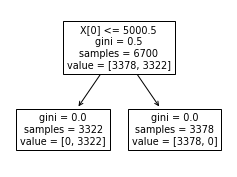

In [64]:
tree.plot_tree(dtc_phis)